# Analysis of the model performance

## Preparation part

First of all, install all necessary dependencies and execute the `main.py` script. 
The script requires a URI as an input parameter, which points to a JSON file containing the model's operation results on a specified dataset.
`main.py` will fill `plots` folder with necessary images of model statistics. If images already exist in the folder, they will be replaced. 

In [49]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [50]:
!python ./main.py "https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json"

./plots/confusion_matrix.png
./plots/accuracy_table.html
./plots/box_plot_means.png
./plots/box_plot_maxs.png
./plots/box_plot_mins.png
./plots/box_plot_average_deviation_type.png
./plots/box_plot_floor_deviation_type.png
./plots/box_plot_ceiling_deviation_type.png
./plots/metrics_table.html


## Analysis


> At this juncture, the `plots` directory should contain visual representations of plots and tables.

Import all necessary modules:

In [51]:
import pandas as pd 
import os
from IPython.display import display, Image, HTML
from PIL import Image as PilImage
import matplotlib.pyplot as plt

Let's display the part of the data with which the analysis will be performed: 

In [52]:
data = pd.read_json("https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json")
data.head(5)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


Load all the plots and table files from the `plots` directory into the images variable:

In [53]:
folder_path = './plots'
images = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    print(filename)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        images[filename] = Image(filename=file_path)
    elif filename.lower().endswith('.html'):
        with open(file_path, 'r') as file:
            html_content = file.read()
        images[filename] = HTML(html_content)
    # display(images[filename])


confusion_matrix.png
accuracy_table.html
box_plot_means.png
box_plot_maxs.png
box_plot_mins.png
box_plot_average_deviation_type.png
box_plot_floor_deviation_type.png
box_plot_ceiling_deviation_type.png
metrics_table.html


The task at hand is identified as a regression problem. The model's input is an image, and its objective is to predict the number of corners present in it. This prediction involves estimating a numerical value — the count of corners in a room image - which classifies the task as a regression problem.

Determining the specific type of regression employed in the model is not feasible without knowledge of the training process and the activation functions utilized within the neural network.

For assessing the performance of a regression model, error metrics are employed. Common metrics for regression model evaluation include:

    MAE - Mean Absolute Error
    MSE - Mean Squared Error
    R2 - Coefficient of Determination

Now, let's proceed to compute the metric data for the gt_corners and rb_corners values.

In [54]:
display(images['accuracy_table.html'])

,MAE,MSE,R2
0,0.0,0.0,1.0


MAE and MSE are both equal to 0.0, and R2 is 1.0, it signifies an exact alignment of the model with the dataset. This outcome is exceptionally rare and could be considered suspicious, given the inherent presence of errors or random fluctuations in real-world data. Such a perfect match might suggest that the **model** is **retrained** 

For more clarity, we can consider the **confusion matrix**. Given that this is not a regression task, it is necessary to segment the data into intervals based on the number of corners:

<div align="center">
    <img src="./plots/confusion_matrix.png" alt="Confusion Matrix" width="500" height="400">
</div>

False Positives (FP) and False Negatives (FN) are both equal to 0, it signifies that the model accurately predicts classes without any misclassifications. This outcome indicates a model with flawless prediction capabilities.

To investigate the possibility of retraining, it is advisable to employ **cross-validation** and **learning curves**. However, in the **absence of such data**, it becomes challenging to discern the underlying reasons for the model's behavior.

Additionally, the significance of the columns, beginning with the `mean column`, remains ambiguous. It is unclear whether these columns represent deviations from 90 degrees. The nature of these deviations from the specified values is not evident. 

Considering the **image provided** (see below), it is illogical to demand 90 degrees when a significant distortion is present.

But the task necessitates *"draws plot for comparing different columns"*, so if it's required, statistical plots and a table will be presented for clarity further.

<div align="center">
    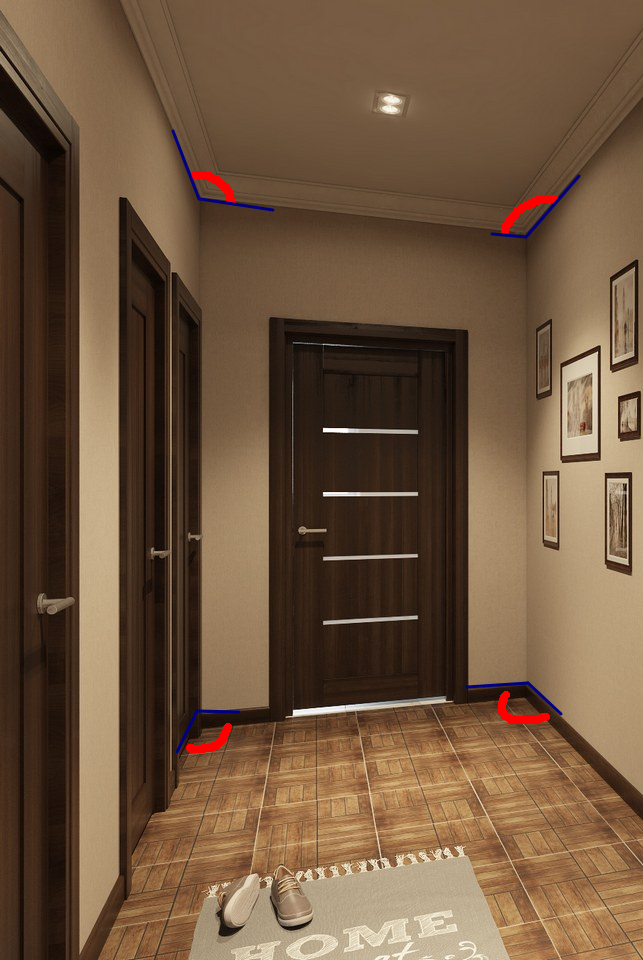
</div>

Analysis of the average, maximum, and minimum values concerning the deviations in the corners of the floor, ceiling, and joint.

<div align="center">
    <img src="./plots/box_plot_means.png" alt="box plot means" height="200">
</div>

****

<div align="center">
    <img src="./plots/box_plot_maxs.png" alt="box plot maxs" height="4200">
</div>

****

<div align="center">
    <img src="./plots/box_plot_mins.png" alt="box plot mins" height="400">
</div>

Comparison of the mean, max and min values inside the readings of the deviations of the corners of the floor, ceiling and average.

<div align="center">
    <img src="./plots/box_plot_average_deviation_type.png" alt="box plot means" height="200">
</div>

****

<div align="center">
    <img src="./plots/box_plot_floor_deviation_type.png" alt="box plot maxs" height="200">
</div>

****

<div align="center">
    <img src="./plots/box_plot_ceiling_deviation_type.png" alt="box plot mins" height="200">
</div>

Now we'll compute the values of the 

    Mean Absolute Deviation (MAD), 
    Mean Absolute Percentage Deviation (MAD), 
    Root Mean Square Deviation (RMS), 
    and Emax 
    
for each column, beginning from the sample in `mean column`, and compare these values with the average for the sample.

In [55]:
display(images['metrics_table.html'])

,MAD,MAPD,RMSD,Emax
average_mean,15.191425,1065.359958,1.392600e-15,108.405735
floor_mean,12.819371,1144.635993,3.798001e-16,110.221640
ceiling_mean,17.806812,1129.725154,1.688001e-16,142.619276
average_max,29.825735,1137.246221,1.477000e-15,153.717472
floor_max,23.427776,1257.765007,8.440003e-17,157.556312
ceiling_max,29.528236,1203.304806,6.752002e-16,154.317464
average_min,4.362202,1628.980771,1.055000e-16,78.844095
floor_min,4.626524,1560.076840,0.000000e+00,78.645259
ceiling_min,7.872465,1532.694312,3.165001e-17,138.951096
